# Image Processing and Pattern Recognition
Welcome! This is an interactive notebook for the UTS subject, _31265 Image Processing and Pattern Recognition_. 

**Author:** [Liam Zebedee](https://www.facebook.com/profile.php?id=100007106130451) - feel free to get in touch about anything!

## 1. What is an image?
### 1.1 Light and waves
**What is an image?** The human eye sees light, not JPEG. So what does light look like? 

Light is a wave. You remember waves from maths? They look like this:

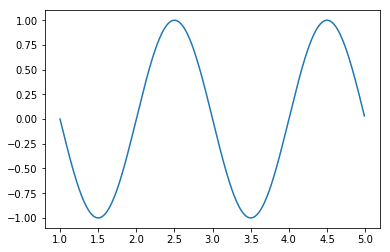

In [1]:
import matplotlib.pyplot as plt  
import numpy as np 

x = np.arange(1.0, 5.0, 0.01)
y = np.sin(np.pi * x)
plt.plot(x, y)
plt.show()

This is an example of the trigonometric equation, $y = {\pi}x$

Well light is the same thing. Look, here's a light wave:

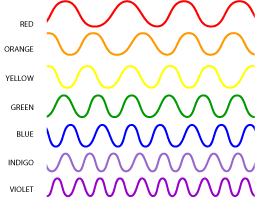

Notice, the red light waves are slower than the purple ones. We call it the period in Maths. This is how you can represent light using functions!

### 1.2 Pixels
A pixel (short for picture element, duh!) is an approximation of a wave. There are many ways of representing these measurements - these are the different **colour spaces**:

The main colour space we use on websites is **RGB**, which stands for Red, Green and Blue. We can represent _most_ colours using a mixture of these three (although it is an approximation).

So a pixel is represented in its most basic form as:

$pixel = [red, green, blue]$

In RGB, there are 256 shades for each of red, green and blue. Why 256? Well, it relates to how one stores a pixel. How much data do you think you would need to store all possible shades of red?

Since computers operate in base 2 (binary), you can calculate how many bits you need to store $n$ different choices using this equation:

$bits = \log_2{n}$

In [2]:
import numpy as np
number_of_shades_of_red = 256
bits_we_need = np.log2(number_of_shades_of_red)

print("We need {} bits to store 256 shades of red".format(bits_we_need))

We need 8.0 bits to store 256 shades of red



To represent this range, you need 8 bits. But if you nibble 8 bits of a sandwich, you've essentially taken a bite. Computer scientists spell it as **byte**. 

### 1.3 JPEGs
So a JPEG image is basically a bunch of pixels arranged in columns and rows. 

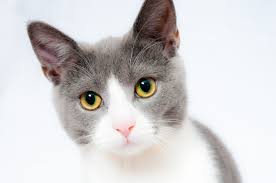

The image of this cat is $276$ x $183$ pixels. It's also $4,638$ bytes in size. 

So if the number of pixels is $276\cdot183 = 50,508$, and we know each pixel is represented by 3 bytes for the red, green and blue, we should be able to calculate the size of the file.

In [3]:
# a pixel is (r, g, b)
# an r is just one byte
size_of_one_pixel = 1 + 1 + 1
number_of_pixels = 276 * 183
size_of_image = size_of_one_pixel * number_of_pixels

print("Size of image: {} bytes".format(size_of_image))

Size of image: 151524 bytes


Wait a minute, didn't we just check and see that the size was $4,638$ bytes? Where are those $146,000+$ bytes going? The answer, is **compression**.

### 1.4 Compression
There are many techniques for compression. Only a brief overview is given here.

For JPEG, the principle method of compressing these pixels is transforming them from the _spatial_ domain into the _frequency_ domain. You may be asking, WTF does that mean?

The **spatial domain** is akin to real-life. When you talk about the spatial domain of an image, you're talking about the pixels along the $x$ and $y$ axes. It's just about the space. 

The **frequency domain** is a bit more abstract - it involves converting a set of pixels into a smaller set of equations. The equations themselves are waves (just like colour in real-life!), but as opposed to pixels, they are approximations. 

#### Naive algorithm for spatial to frequency domain
> Using one of these equations, giving it an $(x,y)$, we can calculate what the original pixel value is.

Say we have a very small image which is $3$ x $3$. Let's try convert these pixels (spatial domain) to an equation that represents them roughly (frequency domain). This is how we can do it:

 1. Sort the pixels.
 2. Count their frequency
 3. Make an equation that fits this data.


In [4]:
from scipy.optimize import curve_fit
from sympy import S, symbols
import numpy as np
import warnings


pixels = np.array([100, 120, 124, 100, 26, 50, 100, 26, 120])
print("1. Sort pixels: {}".format(np.sort(pixels)))


unique, frequency_counts = np.unique(pixels, return_counts=True)
print("2. Count their frequency: {}".format(frequency_counts))


print("3. Convert to an equation")
x = [val for val in range(len(unique))]
y = [val for val in frequency_counts]

print("X values: {}".format(x))
print("Y values: {}".format(y))



def plot_linear_equation(x, y):
    fitted_linear_equation = np.polyfit(x, y, 5)
    plt.plot(fitted_linear_equation)

def plot_curve_equation(x, y):
    z = np.polyfit(x, y, 5)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(x_new)

    plt.plot(x, y, 'o', x_new, y_new)
    plt.xlim([x[0]-1, x[-1] + 1 ])
    
    def print_actual_equation(poly, variable="x", width=2):
        t = ["{0:0.{width}f}"]
        t.append(t[-1] + " {variable}")
        t.append(t[-1] + "^{1}")

        def f():
            for i, v in enumerate(reversed(poly)):
                idx = i if i < 2 else 2
                yield t[idx].format(v, i, variable=variable, width=width)

        return "$y = {}$".format("+".join(f()))

    plt.xlabel(poly2latex(fitted_equation), fontsize=16)
    
warnings.catch_warnings()
warnings.simplefilter('ignore', np.RankWarning)

try:
    plot_linear_equation(x, y)
    plot_curve_equation(x, y)
    plt.show()
except:
    pass


1. Sort pixels: [ 26  26  50 100 100 100 120 120 124]
2. Count their frequency: [2 1 3 2 1]
3. Convert to an equation
X values: [0, 1, 2, 3, 4]
Y values: [2, 1, 3, 2, 1]


#### The DCT
This is the general idea of compression! In JPEG, the equation is something called a **Discrete Cosine Transform** or the DCT. The underlying assumption is that the coefficients (-5.20, 5.39, -0.99, -0.27, 0.06) are much smaller to store than all of the individual pixels.



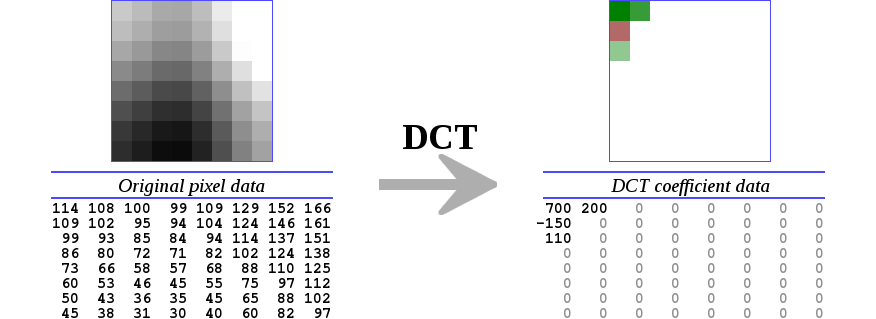

## 2. Image analysis and processing
### 2.1 Types of algorithms
There are many ways to analyse images. Approaches based in human-engineered methods (as oppposed to AI) generally are categorised by how they process each pixel in an image:

 - point
 - local - processing is dependent on the neighbourhood surrounding that pixel
 - global - processing is dependent on entire image

Image processing usually affects the quality of an image - that is, it makes it nicer by some aesthetic measure. When does an image not look nice? 

  - when it's blurry
  - when it's pixelly/noisy
  - when it's over-saturated (like at night)

In discourse, these things are categorised as **noise**. You might've heard of the signal-to-noise ratio - that is, how much of what we actually want (termed the signal) compared to the noise. Here's an example of what noise looks like:

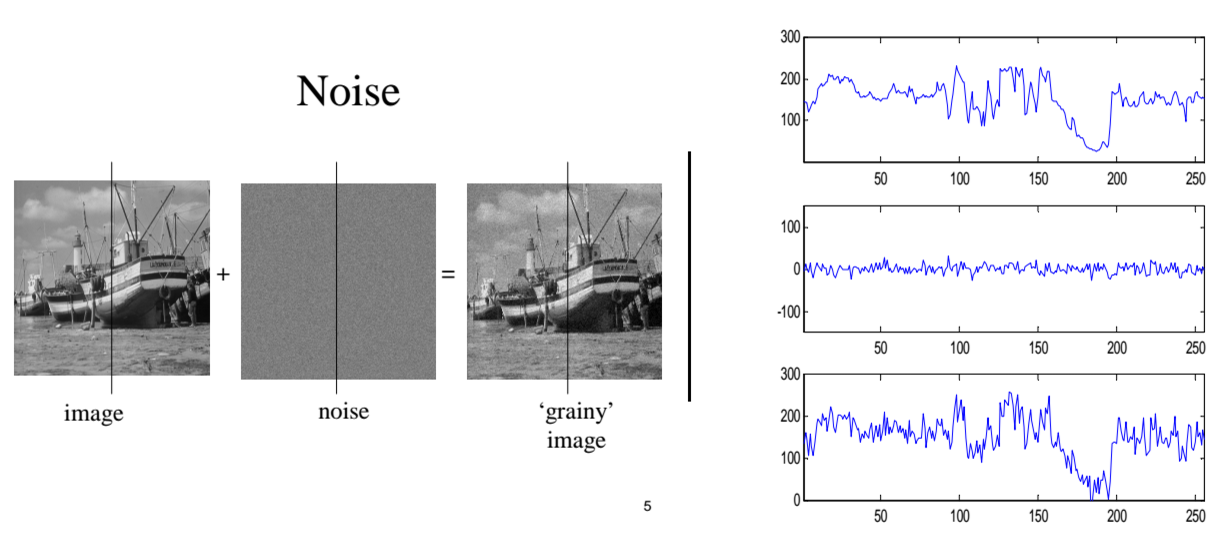

Some types of noise include:
 - **Gaussian**: noise that is typical of natural processes. e.g. poor lighting conditions. It's called Gaussian because it relates directly to the normal (Gaussian) probability distribution. 
 - **Uniform**: artifical noise that is evenly distributed. Usually used to test image restoration algorithms.
 - **Salt and Pepper**: The presence of single dark pixels in bright regions (or the inverse). Usually caused by data corruption.

### 2.2 Filters and noise elimination
Noise can be eliminated through image filters. Image filters work on a _local_ basis. They involve a process called **convolution**, whereby one multiplies pixels of a neighbourhood of (r,c) by the corresponding coefficients of a filter, and add them all up. 

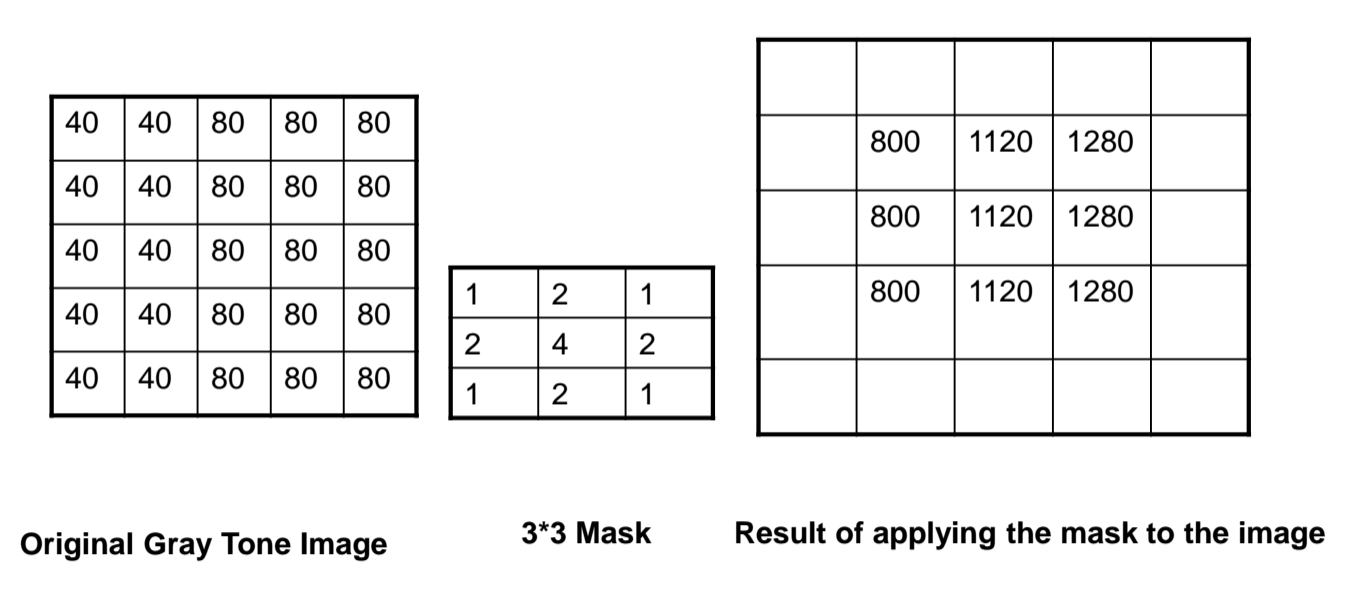

Here's the above filter worked through in code:

In [5]:
input_pixels = np.matrix([
             [40, 40, 80],
             [40, 40, 80],
             [40, 40, 80]
            ])

image_mask = np.matrix([
             [1, 2, 1],
             [2, 4, 2],
             [1, 2, 1]
            ])

def convolve_filter(_input, _filter):
    # Multiply the input pixels element-wise by the coefficients of the filter
    temp1 = np.multiply(_input, _filter)
    print(temp1)
    
    # And then return the average of these values
    temp2 = temp1.sum()
    print(temp2)

print("Result of applying mask to the image")
filtered_pixel = convolve_filter(input_pixels, image_mask)

Result of applying mask to the image
[[ 40  80  80]
 [ 80 160 160]
 [ 40  80  80]]
800


Two distinct reasons for filters:
 1. _Human_: Improving the image for the human eye
 2. _Machine_: Pre-processing as part of image analysis (e.g. an edge detection filter for recognising objects)
 
Let's play with some filters!

Image shape: (332, 486)
Filter shape: (3, 3)


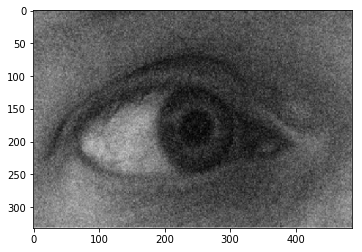

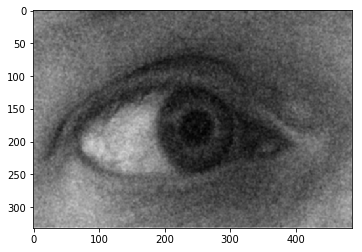

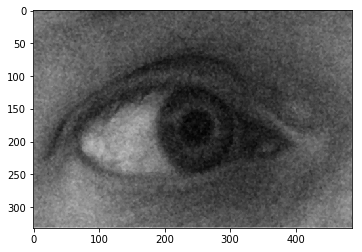

In [96]:
from scipy import misc, ndimage
import matplotlib.pyplot as plot
import numpy as np

def show_image(img):
    plot.imshow(img)
    plot.show()
    
edge_enhancement = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

smoothing = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])


# Import a sample image of a racoon
# This image will be imported as grayscale, meaning there's only one component of colour (as opposed to 3 in RGB)
example_image = misc.imread('./noisy.png', flatten=True)#misc.face(gray=True)
plot.gray()
print("Image shape: {}".format(example_image.shape))

# Define our filter
filter_ = smoothing
print("Filter shape: {}".format(filter_.shape))

# Convolve the image with our filter
filtered_image = ndimage.convolve(example_image, filter_)

# Demonstrate median filtering
median_image = ndimage.median_filter(example_image, 3)


show_image(example_image)
show_image(filtered_image)
show_image(median_image)

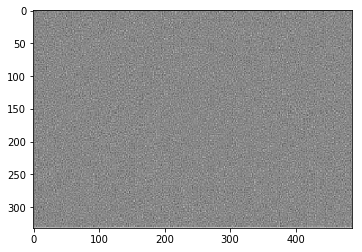

In [7]:
# Example using RGB filters
#kernel = np.resize(kernel, (3, 3, 3,))

# https://softwaredevelopmentperestroika.wordpress.com/2014/02/11/image-processing-with-python-numpy-scipy-image-convolution/

plot.imshow((example_image - filtered_image))
plot.show()

**Low pass** filters, otherwise known as "smoothing“ or “softening”, is employed to remove high spatial frequency
noise from a digital image. These filters replace each pixel with a weighted sum of each pixel's neighbourhood.

**Median filtering** is a non-linear operation that replaces a pixel with the median of its neighbourhood.

## 3. Image Segmentation
Image segmentation deals with identifying the **foreground** and **background** of an image.

One super effective way of doing that is differentiating them based on the intensity of their colour. 

### 3.1 Histograms
For example, here's a picture of our silly Norweigan friend, Alek. Let's make a histogram of the colours in this snap:

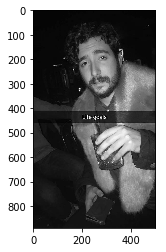

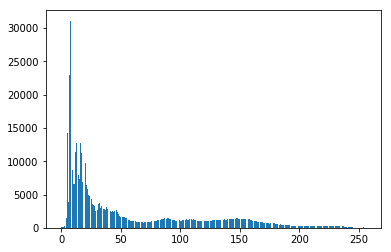

In [8]:
img = np.array(misc.imread('./alex2.jpg', flatten=True), dtype=np.int64)
plot.gray()
show_image(img)


# Construct histogram
def construct_histogram(img):
    bins = np.zeros(256, dtype=np.int64)

    for coords, grayscale_val_f in np.ndenumerate(img):
        grayscale_val = round(grayscale_val_f)
        bins[grayscale_val] = bins[grayscale_val] + 1

    return bins

bins = construct_histogram(img)

# Show the histogram
plt.bar(np.arange(len(bins)), bins)
plt.show()

As you can see above, we've plotted the grayscale intensities of 0 to 255 against how frequently they occur in the image. 

You might recognise that the black background is very prominent for the intensities of $x = 0\rightarrow30$. What would happen if we were to set all of those pixels to $0$?

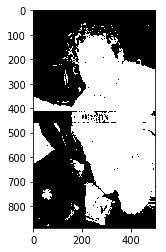

In [9]:
# thresholding example
thresholded_img = img.copy()

# construct a binary image
threshold = np.where(bins == bins.max())
threshold = 30

def apply_threshold(img, t):
    for coords, grayscale_val in np.ndenumerate(img):
        if grayscale_val > t:
            img[coords] = 1
        else:
            img[coords] = 0
    return img

show_image(apply_threshold(thresholded_img, threshold))

#### WHO'S THAT POKEMON?

It's Alek! And we found out because of something we call **thresholding**. Let's try find his beard:

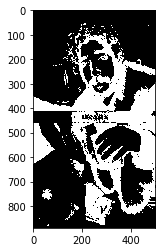

In [10]:
# more complex thresholding
threshold_min = 30
threshold_max = 128

def calculate_value_for_threshold(grayscale_val):
    if threshold_min < grayscale_val < threshold_max:
        return 1
    else:
        return 0

complex_thresholded_img = img.copy()

for coords, grayscale_val in np.ndenumerate(complex_thresholded_img):
    complex_thresholded_img[coords] = calculate_value_for_threshold(grayscale_val)

show_image(complex_thresholded_img)

### 3.2 Thresholding
Here's some different types of thresholds:

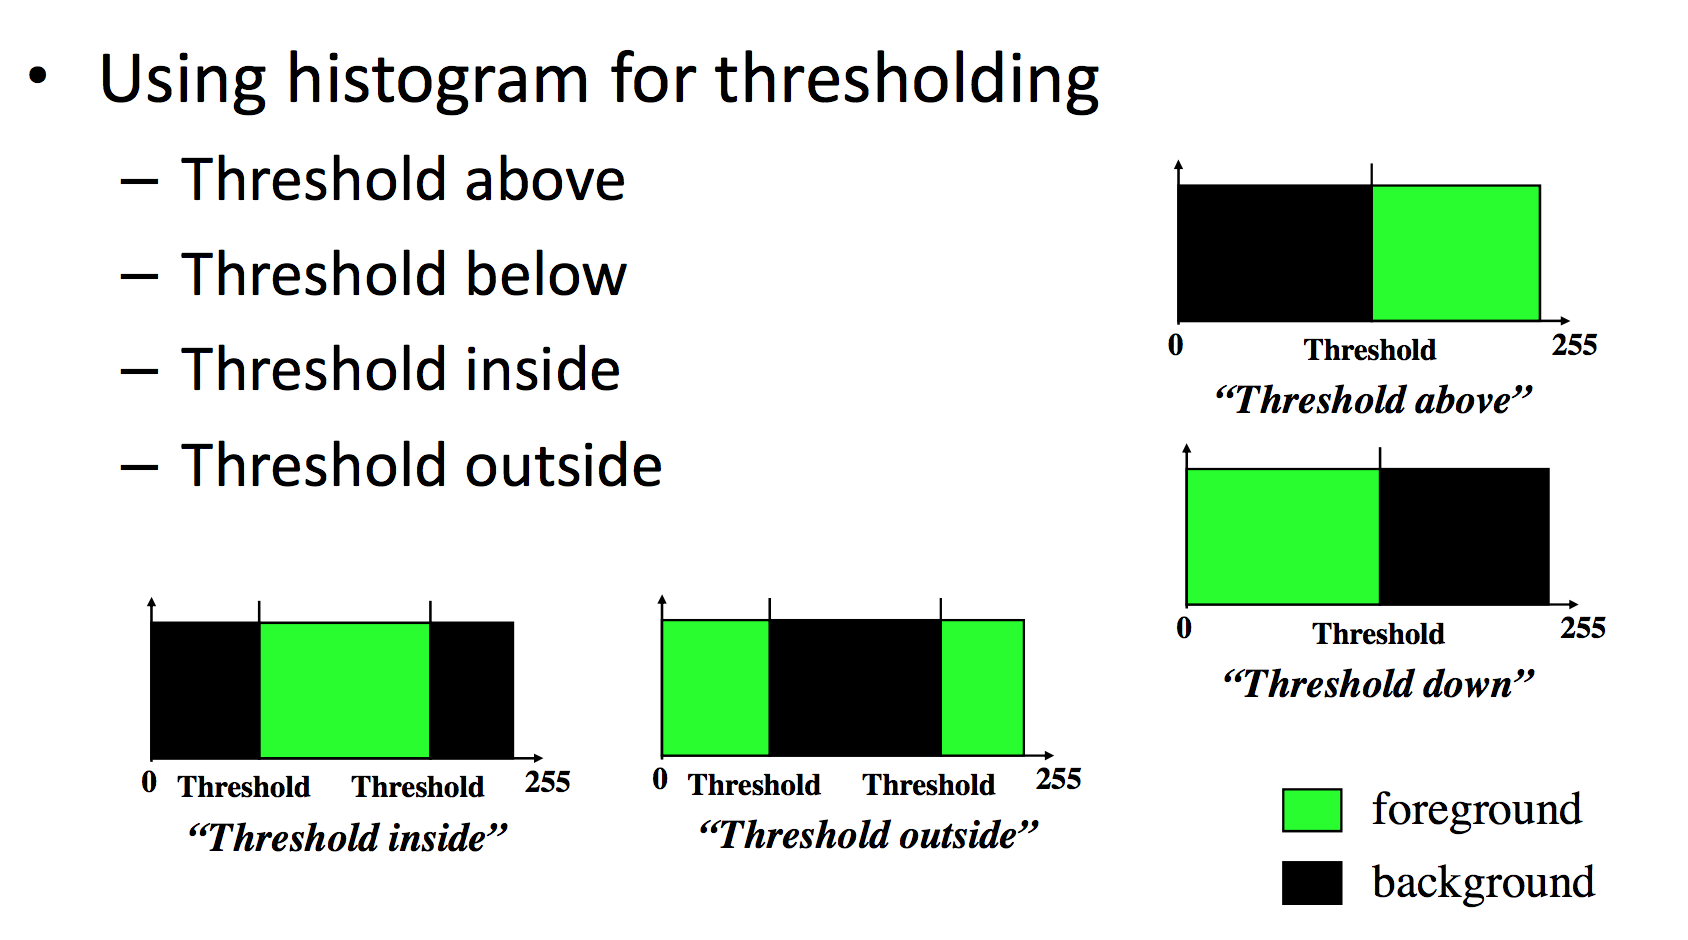

How could we try to find the threshold automatically? Well here's one observation we can use:

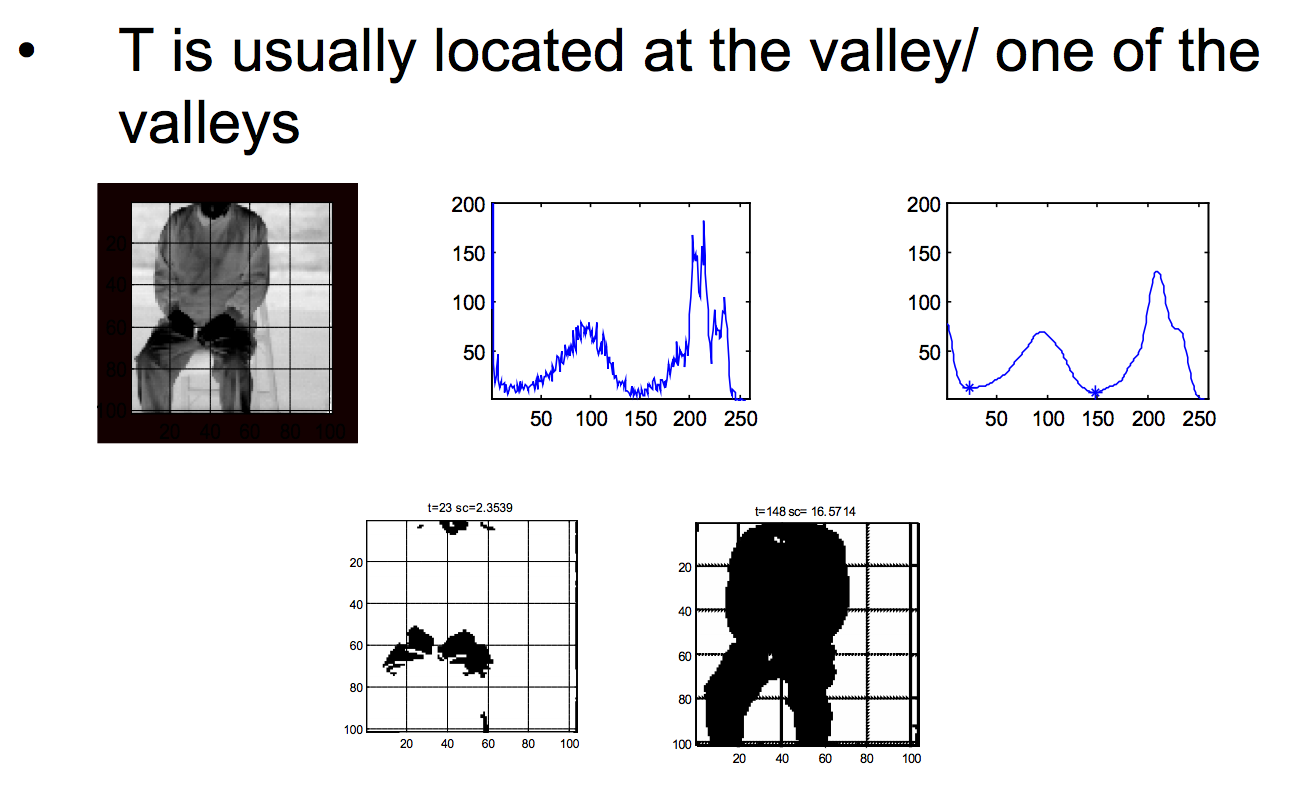

This is what is called **optimum global thresholding**. The method used is one of the most successful, [Otsu's method](http://computervisionwithvaibhav.blogspot.com.au/2015/10/otsu-thresholding.html).

#### A bit on statistics and probability
Here's a quick intuitive recap on the statistics and probability used here.

We can reframe our pixels as a set of data points $x = {...}$. The mean $\mu_x$ of these data points is simply the average value. 

The variance is useful because it allows us to calculate how much each bar in the graph differs from the other. We do this by calculating the absolute difference between each data point $(x_i - \mu)^2$ and multiplying it by its frequency/probability $p_i$. 

$$\sigma^2 = \frac{\sum\limits_{i=1}^n p_i \times (x_i - \mu)^2}{n}$$

In terms of this distribution, we are trying to differentiate between the foreground and the background. Mathematically speaking, we have two classes $C_1$ and $C_2$, and we are trying find the optimal threshold value $t$.

To do this, Otsu defined something called the **weighted intra-class variance**. This is basically the degree to which the bars of a class differ (variance), weighted by how high they are ($\omega_(t)$). 

$$\sigma _{w}^{2}(t) = \omega _{0}(t)\sigma _{0}^{2}(t)+\omega _{1}(t)\sigma _{1}^{2}(t)$$

And for clarity, the weights are as so:

$${\omega _{0}(t) = \sum _{i=0}^{t-1}p(i)}$$

This is the naive implementation, which quickly becomes expensive to compute. Since minimizing the within-class variance is the same as maximising the inter-class variance, Otsu suggested a less computationally-intensive method:

$${\sigma _{w}^{2}(t) = \omega _{0}(t)\omega _{1}(t)\left[\mu _{0}(t)-\mu _{1}(t)\right]^{2}}$$

Some example values for t=50
Weight of class 0: 281346
Class mean for class 0: 18.637798298180886
Automatically calculated threshold t=25


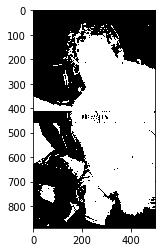

In [93]:
auto_thresholded_img = img.copy()

# Find the threshold that minimizes the weighted within-class variance
class OtsusMethod():
    def __init__(self, histogram):
        self.histogram_bins = histogram
    
    def weight(self, t, class_):
        if class_ == 0:
            bins = self.histogram_bins[:t]
        else:
            bins = self.histogram_bins[t:]
        return bins.sum()
    
    def class_mean(self, t, class_):
        if class_ == 0:
            bins = self.histogram_bins[:t]
        else:
            bins = self.histogram_bins[t:]
        
        weight = self.weight(t, class_) or 1 # prevent divide-by-zero
        
        sum = 0
        for count, i in enumerate(bins.tolist()):
            sum += i * (count / weight)
        return sum
    
    def print_example_values(self, t=50):
        print("Some example values for t=50")
        print("Weight of class 0: {}".format(self.weight(t, 0)))
        print("Class mean for class 0: {}".format(self.class_mean(t, 0)))
    
    def auto_threshold(self):
        threshold_candidates = np.array(range(1, len(self.histogram_bins) - 1))
        otsu_equation = np.vectorize( lambda t: self.weight(t, 0) * self.weight(t, 1) * np.square(self.class_mean(t, 0) - self.class_mean(t, 1)) )
        return otsu_equation(threshold_candidates).argmax()

otsu = OtsusMethod(construct_histogram(auto_thresholded_img))
otsu.print_example_values()
threshold = otsu.auto_threshold()
print("Automatically calculated threshold t={}".format(threshold))

show_image(apply_threshold(auto_thresholded_img, threshold))

WOAH! That was cool. We used not-too-complex Maths to segment an image pretty similar to how a human would!

### 3.3 Normalising histograms
There's one other trick that is pretty useful, and that's normalising a histogram.

Normalising histogram with remapping factor 0.00010808308919270833


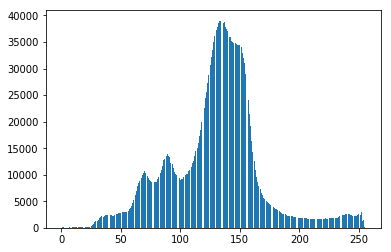

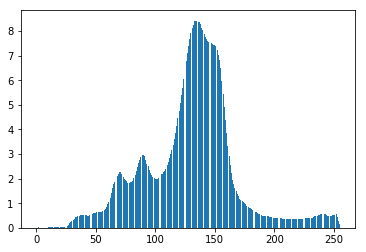

In [108]:
def normalise_histogram(histogram):
    value_range = 256
    bins = np.zeros(value_range, dtype=np.float64)
    total_pixels = histogram.sum()
    remapping_factor = (value_range - 1) / total_pixels
    
    print("Normalising histogram with remapping factor {}".format(remapping_factor))
    
    for intensity in range(0, value_range):
        if intensity == 0:
            bins[intensity] = histogram[0]
        else:
            bins[intensity] = histogram[intensity - 1] + histogram[intensity]

        # Normalise
        bins[intensity] = remapping_factor * bins[intensity]
    
    return bins

img = np.array(misc.imread('./road.jpg', flatten=True), dtype=np.int64)

histogram = construct_histogram(img.copy())
normalised_histogram = normalise_histogram(histogram)

plt.bar(np.arange(len(histogram)), histogram)
plt.show()

plt.bar(np.arange(len(normalised_histogram)), normalised_histogram)
plt.show()

### 3.4 Edge detection
Aside from thresholding, edge detection is also a common image segmentation method. There are many different varieties:

 - **Gradient-based**: Roberts, Sobel, Prewitt. These filters follow the same format as a convolution matrix. 
 - **Laplacian of the Gaussian**: this involves computing the second derivative 
 - **Canny edge detection**
 
Roberts, Sobel, Prewitt are all very simple and fast; you must verify if they are adequate for your application (Sobel is often used). LoG and Canny are more sophisticated, Canny is more accurate and most often used.

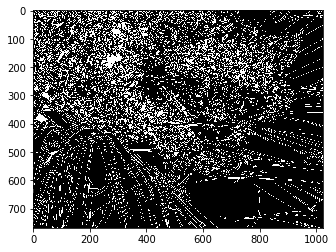

In [133]:
from scipy import misc, ndimage
import matplotlib.pyplot as plot
import numpy as np
from skimage import data, feature, exposure
from skimage.feature import canny


example_image = misc.face(gray=True)
plot.gray()



#example_image = exposure.equalize_hist(example_image)
#blobs = feature.blob_log(example_image, threshold = .3)
#for x, y, sigma in blobs:
#    example_image[int(x)][int(y)] = 255

edges = canny(example_image, low_threshold=40)
show_image(ndimage.binary_fill_holes(edges))

#print(laplace)
#ndimage.filters.laplace